In [1]:
import frank_lab

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(rc={'figure.figsize': (12, 6),'lines.linewidth': 2, 'font.size': 18, 'axes.labelsize': 16, 'legend.fontsize': 12, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })
sns.set_style('white')


In [3]:
import os.path
import scipy.io
import pandas as pd
import numpy as np
import re
import glob

In [4]:
fileroot = '/Users/ckemere/Data/Fra';

In [5]:
cellinfo, raw = frank_lab.load_cellinfo(fileroot)

Loading fracellinfo.mat


In [6]:
cellinfo.columns

Index(['Tetrode', 'Day', 'subarea', 'spikewidth', 'meanrate', 'Cell',
       'hemisphere', 'area', 'type', 'nearCA2', 'Epoch', 'numspikes'],
      dtype='object')

In [7]:
print(set(cellinfo['type']))

{nan, 'inter', 'principal'}


/Users/ckemere/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


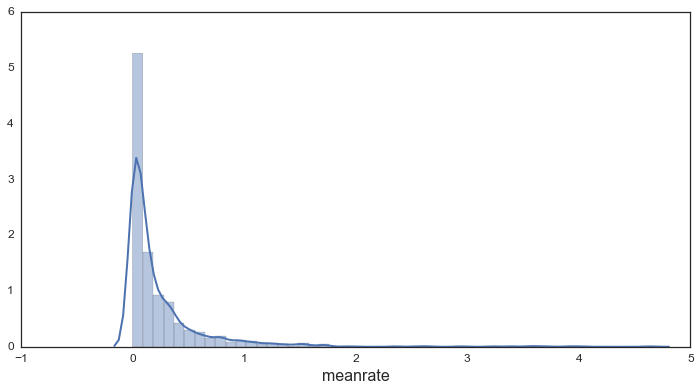

In [8]:
sns.distplot(cellinfo.query('area=="CA1" & type=="principal"')['meanrate'])

In [9]:
cellinfo.query('area=="CA1" & type=="principal" & numspikes > 0')["Day"].value_counts()

10    174
9     151
8     144
6     130
7     119
11    114
5      97
4      88
3      50
Name: Day, dtype: int64

In [10]:
task = frank_lab.load_task(fileroot)


Loading fratask02.mat
Loading fratask03.mat
Loading fratask04.mat
Loading fratask05.mat
Loading fratask06.mat
Loading fratask07.mat
Loading fratask08.mat
Loading fratask09.mat
Loading fratask10.mat
Loading fratask11.mat
Loading fratask12.mat


In [11]:
pos = frank_lab.load_pos(fileroot,day=0)

Loading frapos02.mat
Loading frapos03.mat
Loading frapos04.mat
Loading frapos05.mat
Loading frapos06.mat
Loading frapos07.mat
Loading frapos08.mat
Loading frapos09.mat
Loading frapos10.mat
Loading frapos11.mat
Loading frapos12.mat


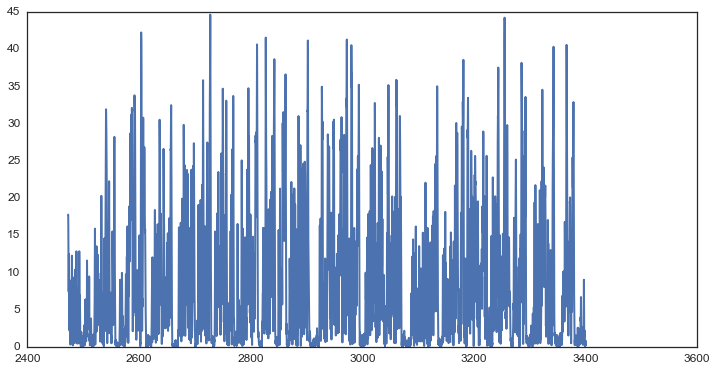

In [12]:
plt.plot(pos.query('Day==1 & Epoch==1').time.item(), pos.query('Day==1 & Epoch==1').vel.item())

In [13]:
spikes = frank_lab.load_spikes(fileroot)

Loading fraspikes02.mat
Loading fraspikes03.mat
Loading fraspikes04.mat
Loading fraspikes05.mat
Loading fraspikes06.mat
Loading fraspikes07.mat
Loading fraspikes08.mat
Loading fraspikes09.mat
Loading fraspikes10.mat
Loading fraspikes11.mat
Loading fraspikes12.mat


In [14]:
dk = 10; 
ep_list = list(task.query('Day==@dk & environment=="TrackB"')["Epoch"]); 
print(ep_list); 
ep = ep_list[0]

[1, 3]


In [15]:
placecellspikes = pd.merge(cellinfo.query('area=="CA1" & type=="principal" & numspikes > 0'), 
                     spikes, 
                     on=['Day','Epoch', 'Tetrode', 'Cell'], # doing a join using these two columns to find matches
                            # note that the result will be a cellinfo with all the task columns
                     how='inner', # inner uses the intersection of keys from both frames
                     suffixes=('','_')) # a tuple describing how


In [16]:
print(pos.query('Day==@dk & Epoch==@ep').time.values[0][0], 
     pos.query('Day==@dk & Epoch==@ep').time.values[0][-1])

1928.0283 2852.977


In [17]:
def find_nearest(array,values):
    right_idxs = np.searchsorted(array, values, side="left")
    left_idxs = np.where(right_idxs > 0, right_idxs-1, right_idxs)
    right_idxs = np.where(right_idxs == len(array), len(array)-1, right_idxs)
    closest_idx = np.where(np.abs(values - array[right_idxs]) < np.abs(values - array[left_idxs]),
                          right_idxs, left_idxs)
    return closest_idx

23
24


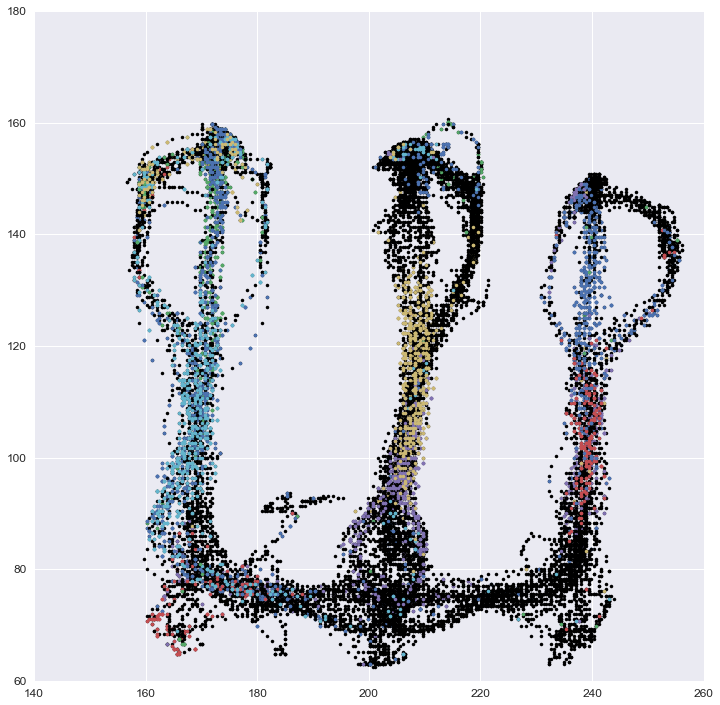

In [18]:
for ep in ep_list:
    print(placecellspikes.query('Day==@dk & Epoch==@ep').shape[0])
sns.set(rc={'figure.figsize': (12, 12),'lines.linewidth': 2, 'font.size': 18, 'axes.labelsize': 16, 'legend.fontsize': 12, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })

plt.axes(aspect=1)

for ep in ep_list:
    postimes = pos.query('Day==@dk & Epoch==@ep').time.item() # first match (should be only one)
    posx = pos.query('Day==@dk & Epoch==@ep').x.item() # first match (should be only one)
    posy = pos.query('Day==@dk & Epoch==@ep').y.item() # first match (should be only one)
    posvel = pos.query('Day==@dk & Epoch==@ep').vel.item() # first match (should be only one)
    plt.plot(posx[posvel > 3], posy[posvel > 3],'k.')
    for rowidx, spkitem in placecellspikes.query('Day==@dk & Epoch==@ep').iterrows() :
        spikeposidx = find_nearest(postimes, spkitem.spiketimes)
        #idx = np.searchsorted(postimes, all_spikes, side="left")
        #print(moving_idx.shape, idx.shape, posvel.shape)
        spikeposidx_moving = spikeposidx[posvel[spikeposidx] > 3]
        plt.plot(posx[spikeposidx_moving], posy[spikeposidx_moving],'.')



In [33]:
task.query('Day==@dk & Epoch==@ep')

,Day,Epoch,type,exposure,environment,description,sleepnum,dailyexposure,exposureday,experimentday,tracksexperienced,dailytracksexperienced,linearcoord
66,10,3,run,20.0,TrackB,TrackB,NaN,2.0,10.0,16.0,NaN,NaN,[[[[ 208.15668203 208.15668203 208.15668203 ...


In [32]:
ep

3